The aim of this notebook is to analyse Data Wave's customer data. This has already been cleaned in BigQuery.
The first part is to import my packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl


In [2]:
#Importing Data File and Describing Data

df = pd.read_csv('customer_data_removed_duplicates.csv')

df.describe()

,age,avg_listening_hours_per_week,total_songs_played,satisfaction_score,churned,monthly_fee
count,700.000000,700.000000,700.000000,656.000000,700.000000,585.000000
mean,38.488571,10.025286,499.062857,3.140244,0.305714,7.492000
std,15.241448,4.813759,22.493020,1.185857,0.461039,3.987076
min,13.000000,0.100000,440.000000,1.000000,0.000000,0.000000
25%,25.000000,6.600000,484.000000,2.000000,0.000000,5.000000
50%,39.000000,10.000000,498.000000,3.000000,0.000000,7.990000
75%,51.000000,13.300000,513.000000,4.000000,1.000000,9.990000
max,64.000000,23.700000,571.000000,5.000000,1.000000,12.990000


In [3]:
#Finding total monthly fee and yearly revenue

total_monthly_fee = df['monthly_fee'].sum()

total_yearly_revenue = total_monthly_fee*12

print(f'The total monthly fee users pay is: ${total_monthly_fee}')

print()

print(f'The yearly revenue if all customers stayed the duration of a year is: ${total_yearly_revenue}')

#Total monthly fee per region

# This is picking each row where country is UK and outputting column monthly fee df.loc[df['country'] == 'United Kingdom', 'monthly_fee']

total_monthly_fee_UK = df.loc[df['country'] == 'United Kingdom', 'monthly_fee'].sum()

total_monthly_fee_USA = df.loc[df['country'] == 'USA', 'monthly_fee'].sum()

total_monthly_Brazil = df.loc[df['country'] == 'Brazil', 'monthly_fee'].sum()

total_monthly_Ghana = df.loc[df['country'] == 'Ghana', 'monthly_fee'].sum()

total_monthly_South_Africa = df.loc[df['country'] == 'South Africa', 'monthly_fee'].sum()

total_monthly_fee_India = df.loc[df['country'] == 'India', 'monthly_fee'].sum()

total_monthly_fee_Nepal = df.loc[df['country'] == 'Nepal', 'monthly_fee'].sum()

total_monthly_fee_Nigeria = df.loc[df['country'] == 'Nigeria', 'monthly_fee'].sum()

total_monthly_fee_Kenya = df.loc[df['country'] == 'Kenya', 'monthly_fee'].sum()

#Turning each assigned variable into a tuple and adding them to a list.

country_monthly_fees = [
    ('United Kingdom', total_monthly_fee_UK),
    ('USA', total_monthly_fee_USA),
    ('Brazil', total_monthly_Brazil),
    ('Ghana', total_monthly_Ghana),
    ('South Africa', total_monthly_South_Africa),
    ('India', total_monthly_fee_India),
    ('Nepal', total_monthly_fee_Nepal),
    ('Nigeria', total_monthly_fee_Nigeria),
    ('Kenya', total_monthly_fee_Kenya)
]

print()

#Creating an empty dictionary. Country is the key and the loop is adding each country
#from the tuple and assign values of monthly_fee from tuple and adding second key for yearly fee

country_fee_data = {}

for country, monthly_fee in country_monthly_fees:
    country_fee_data[country] = {
        'monthly_fee': monthly_fee, 
        'yearly_revenue': monthly_fee*12
    }

for country, data in country_fee_data.items():
    print(f"{country}:")
    print(f"Monthly Fee: ${data['monthly_fee']:.2f}")
    print(f"Yearly Revenue: ${data['yearly_revenue']:.2f}\n")

null_monthly_fee = df['monthly_fee'].isnull().sum()

print(f"The medium total monthly fee of null data missing is ${null_monthly_fee*7.99}")

print()  
    
print(f"The medium yearly monthly fee of null data missing is ${null_monthly_fee*7.99*12}")      

print() 
      
print("Percentage of null data %:",null_monthly_fee/7)

#numb_of_null_monthly_fee = (null_monthly_fee['monthly_fee'] == True).count()

#print(numb_of_null_monthly_fee)


The total monthly fee users pay is: $4382.82

The yearly revenue if all customers stayed the duration of a year is: $52593.84

United Kingdom:
Monthly Fee: $1158.90
Yearly Revenue: $13906.80

USA:
Monthly Fee: $479.54
Yearly Revenue: $5754.48

Brazil:
Monthly Fee: $282.73
Yearly Revenue: $3392.76

Ghana:
Monthly Fee: $295.72
Yearly Revenue: $3548.64

South Africa:
Monthly Fee: $327.70
Yearly Revenue: $3932.40

India:
Monthly Fee: $726.29
Yearly Revenue: $8715.48

Nepal:
Monthly Fee: $333.69
Yearly Revenue: $4004.28

Nigeria:
Monthly Fee: $369.66
Yearly Revenue: $4435.92

Kenya:
Monthly Fee: $408.59
Yearly Revenue: $4903.08

The medium total monthly fee of null data missing is $918.85

The medium yearly monthly fee of null data missing is $11026.2

Percentage of null data %: 16.428571428571427


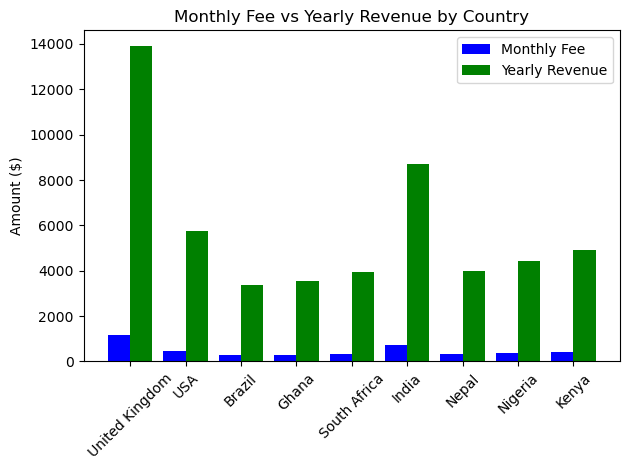

In [4]:
#Printing Monthly_fee vs Yearly_Revenue by Country

countries_name = list(country_fee_data.keys())

t_monthly_fee = [data['monthly_fee'] for data in country_fee_data.values()]

t_yearly_fee = [data['yearly_revenue'] for data in country_fee_data.values()]

#print(t_yearly_fee)

x = range(len(countries_name))

plt.bar(x, t_monthly_fee, width = 0.4, label = 'Monthly Fee', color = 'blue')

plt.bar([i + 0.4 for i in x], t_yearly_fee, width = 0.4, label = 'Yearly Revenue', color = 'green')

plt.xticks([i + 0.2 for i in x], countries_name, rotation = 45)

plt.ylabel('Amount ($)')
plt.title('Monthly Fee vs Yearly Revenue by Country')
plt.legend()
plt.tight_layout()
#plt.savefig('fee_chart.png', dpi = 300)
plt.show()

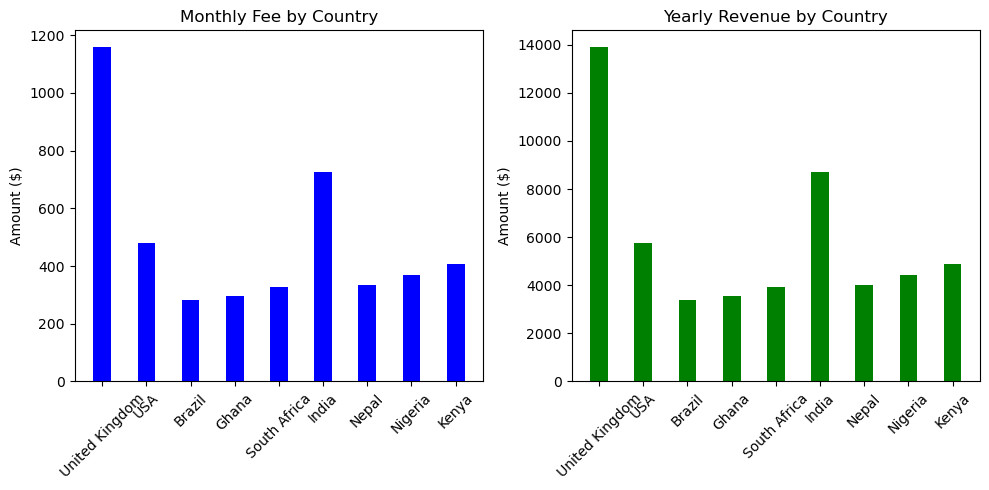

In [23]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].bar(x, t_monthly_fee, width = 0.4, label = 'Monthly Fee', color = 'blue')
axes[0].set_title("Monthly Fee by Country")
axes[0].set_ylabel("Amount ($)")
axes[0].set_xticks(x)
axes[0].set_xticklabels(countries_name, rotation = 45)

axes[1].bar(x, t_yearly_fee, width = 0.4, label = 'Yearly Revenue', color = 'green')
axes[1].set_title("Yearly Revenue by Country")
axes[1].set_ylabel("Amount ($)")
axes[1].set_xticks(x)
axes[1].set_xticklabels(countries_name, rotation = 45)

plt.tight_layout()
plt.savefig('sep_fee_chart.png', dpi = 300)
plt.show()